In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    balanced_accuracy_score,
)
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("PastLoans.csv")
df2 = pd.read_csv("Round1_Training.csv")

In [5]:
df1 = df1.drop(["digital1", "digital2"], axis=1)

In [6]:
df1

,sex,employment,married,income,digital3,default
0,M,unemployed,0,0,0.738735,0
1,M,employed,1,26108,0.733947,0
2,M,employed,1,11810,0.000000,0
3,M,unemployed,1,0,0.000000,0
4,F,retired,1,6310,0.203202,0
...,...,...,...,...,...,...
99995,F,student,0,4564,0.876951,0
99996,M,employed,0,18882,0.556855,0
99997,M,employed,1,19121,0.722149,0
99998,M,employed,1,53563,0.000000,0


In [8]:
df2 = df2.drop("id", axis=1)

In [9]:
df2

,sex,employment,married,income,digital3,default
0,M,employed,0,29758,0.000000,0
1,F,retired,1,6140,0.000000,1
2,F,employed,1,27186,0.000000,0
3,M,employed,1,8429,0.734011,0
4,M,retired,1,2820,0.000000,0
...,...,...,...,...,...,...
99995,M,retired,1,9027,0.213033,0
99996,M,student,0,6229,0.698103,0
99997,M,employed,1,6471,0.751646,0
99998,M,unemployed,0,32654,0.000000,0


In [10]:
df = pd.concat([df1, df2], axis=0)

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df

,sex,employment,married,income,digital3,default
0,M,unemployed,0,0,0.738735,0
1,M,employed,1,26108,0.733947,0
2,M,employed,1,11810,0.000000,0
3,M,unemployed,1,0,0.000000,0
4,F,retired,1,6310,0.203202,0
...,...,...,...,...,...,...
199995,M,retired,1,9027,0.213033,0
199996,M,student,0,6229,0.698103,0
199997,M,employed,1,6471,0.751646,0
199998,M,unemployed,0,32654,0.000000,0


In [19]:
df = pd.get_dummies(df, columns=["sex", "employment"], drop_first=True)

In [20]:
X = df.drop("default", axis=1)
y = df["default"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
lr = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000, class_weight="balanced")

Balanced Accuracy: 0.6728141689763935
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.56      0.70     36021
           1       0.16      0.79      0.27      3979

    accuracy                           0.58     40000
   macro avg       0.56      0.67      0.49     40000
weighted avg       0.88      0.58      0.66     40000



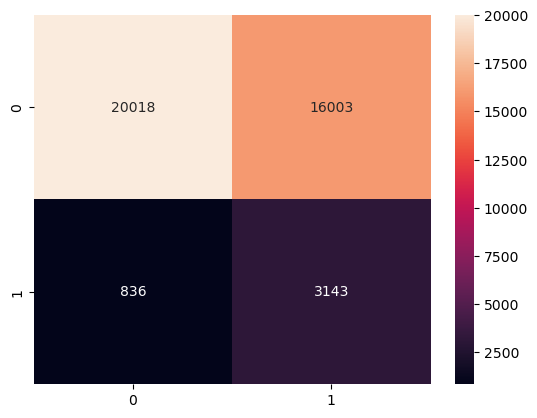

In [23]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
